<a href="https://colab.research.google.com/github/biswajitNanda223/collabFiles/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df=pd.read_csv('/content/sample_data/IndianElection19TwitterData.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
3,3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
4,4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142566 entries, 0 to 142565
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  142566 non-null  int64 
 1   Date        142566 non-null  object
 2   User        142566 non-null  object
 3   Tweet       142566 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.4+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
Date          0
User          0
Tweet         0
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'User', 'Tweet'], dtype='object')

In [ ]:
text_df=df.drop(['Unnamed: 0', 'Date', 'User'],axis=1)
text_df.head()

,Tweet
0,@anjanaomkashyap I am seeing you as future #bj...
1,Trinamool Congress Sitting MP Abhishek Banerje...
2,#LokSabhaElections2019 \n23rd May 2019 will re...
3,#LokSabhaElections2019 \n23rd May 2019 will re...
4,PM Modi creates a new record of being the only...


In [ ]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

@anjanaomkashyap I am seeing you as future #bjp spokesperson..
Good luck. Anjana Om Modi oops Kashyap.
Journalists like you changed the meaning of journalism. Janta maaf nai karege 

Trinamool Congress Sitting MP Abhishek Banerjee sends a defamation notice to Senior BJP leader &amp; Prime Minister #NarendraModi for his alleged derogatory remarks made against him, in a public rally. 

#PollsWithAIR | #LokSabhaElections2019 

#LokSabhaElections2019 
23rd May 2019 will reveal ..
Even ECISVEEP could not help Modi Win 🤔

Janatab Mann Banaata Hai to
Chupke Se Be Jor Se Tappad Deta Hai .. 

#LokSabhaElections2019 
23rd May 2019 will reveal ..
Even @ECISVEEP could not help Modi Win 🤔

Janatab Mann Banaata Hai to
Chupke Se Be Jor Se Tappad Deta Hai .. 

PM Modi creates a new record of being the only PM of a democratic country. 
Congratulations our pm welcome to the Heart of India again 🙏🙏🙏🙏🙏🙏🙏 .#Elections2019 #PMModi #DeshKaGauravModi #2020Election #BJP #India 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142566 entries, 0 to 142565
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Tweet   142566 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [ ]:

# def data_processing(text):
  # text=text.lower()
  # text=re.sub(r"htpps\S+|www\S+https\S+",'',text,flags=re.MULTILINE)
  # text=re.sub(r'\@W+|\#','',text)
  # text=re.sub(r'[^\w\s]','',text)
  # text_tokens=word_tokenize(text)
  # filtered_text=[w for w in text_tokens if not w in stop_words]
  # return " ".join(filtered_text)

def data_processing(text):
    text = text.lower()
    text = re.sub(r'https?\S+|www\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)


In [ ]:
text_df['Tweet'] = text_df['Tweet'].apply(data_processing)

In [ ]:
text_df=text_df.drop_duplicates('Tweet')

In [ ]:
stemmer=PorterStemmer()
def stemming(data):
  text=[stemmer.stem(word) for word in data]
  return data

In [ ]:
text_df['Tweet']=text_df['Tweet'].apply(lambda x: stemming(x))

In [ ]:
text_df.head()

,Tweet
0,seeing future bjp spokesperson good luck anjan...
1,trinamool congress sitting mp abhishek banerje...
2,loksabhaelections2019 23rd may 2019 reveal eve...
3,loksabhaelections2019 23rd may 2019 reveal eve...
4,pm modi creates new record pm democratic count...


In [ ]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

seeing future bjp spokesperson good luck anjana om modi oops kashyap journalists like changed meaning journalism janta maaf nai karege 

trinamool congress sitting mp abhishek banerjee sends defamation notice senior bjp leader amp prime minister narendramodi alleged derogatory remarks made public rally pollswithair loksabhaelections2019 

loksabhaelections2019 23rd may 2019 reveal even ecisveep could help modi win janatab mann banaata hai chupke se jor se tappad deta hai 

loksabhaelections2019 23rd may 2019 reveal even could help modi win janatab mann banaata hai chupke se jor se tappad deta hai 

pm modi creates new record pm democratic country congratulations pm welcome heart india elections2019 pmmodi deshkagauravmodi 2020election bjp india 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139237 entries, 0 to 142565
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Tweet   139237 non-null  object
dtypes: object(1)
memory usage: 2.1+ MB


In [ ]:
def polarity(text):
  return TextBlob(text).sentiment.polarity


In [ ]:
text_df['polarity'] = text_df['Tweet'].apply(polarity)


In [ ]:
text_df.head()


,Tweet,polarity
0,seeing future bjp spokesperson good luck anjan...,0.350000
1,trinamool congress sitting mp abhishek banerje...,-0.050000
2,loksabhaelections2019 23rd may 2019 reveal eve...,0.800000
3,loksabhaelections2019 23rd may 2019 reveal eve...,0.800000
4,pm modi creates new record pm democratic count...,0.468182


In [ ]:
def sentiment(label):
  if label <0:
    return "Negative"
  elif  label ==0:
    return "Neutral"
  elif label>0:
      return "Positive"

In [ ]:
text_df['sentiment']=text_df['polarity'].apply(sentiment)

In [ ]:
text_df.head()

,Tweet,polarity,sentiment
0,seeing future bjp spokesperson good luck anjan...,0.350000,Positive
1,trinamool congress sitting mp abhishek banerje...,-0.050000,Negative
2,loksabhaelections2019 23rd may 2019 reveal eve...,0.800000,Positive
3,loksabhaelections2019 23rd may 2019 reveal eve...,0.800000,Positive
4,pm modi creates new record pm democratic count...,0.468182,Positive


<Axes: xlabel='sentiment', ylabel='count'>

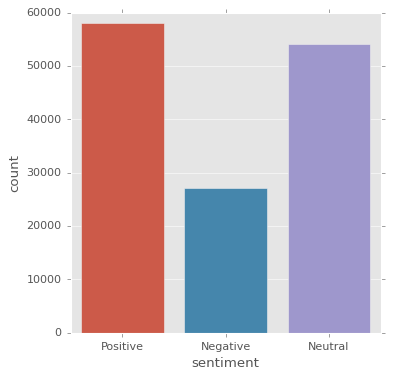

In [ ]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x='sentiment',data=text_df)

Text(0.5, 1.0, 'Distribution of Sentiments')

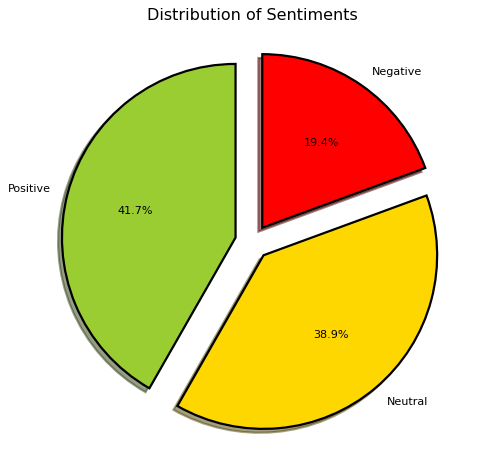

In [ ]:
fig=plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={'linewidth':2,'edgecolor':"black"}
tags=text_df['sentiment'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,
          startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of Sentiments')


In [ ]:
pos_tweets=text_df[text_df.sentiment=='Positive']
pos_tweets=pos_tweets.sort_values(['polarity'],ascending=False)
pos_tweets.head()

,Tweet,polarity,sentiment
67187,done mastery jokergery rahulgandhi u r best ma...,1.0,Positive
134954,priyankagandhi rahulgandhi brother sister perf...,1.0,Positive
13593,chakdefate pajitusigreatho best luck bjp gurda...,1.0,Positive
94402,must stand feet fight best rights carry agitat...,1.0,Positive
94463,1st rally attended idint mind sitting sun wait...,1.0,Positive


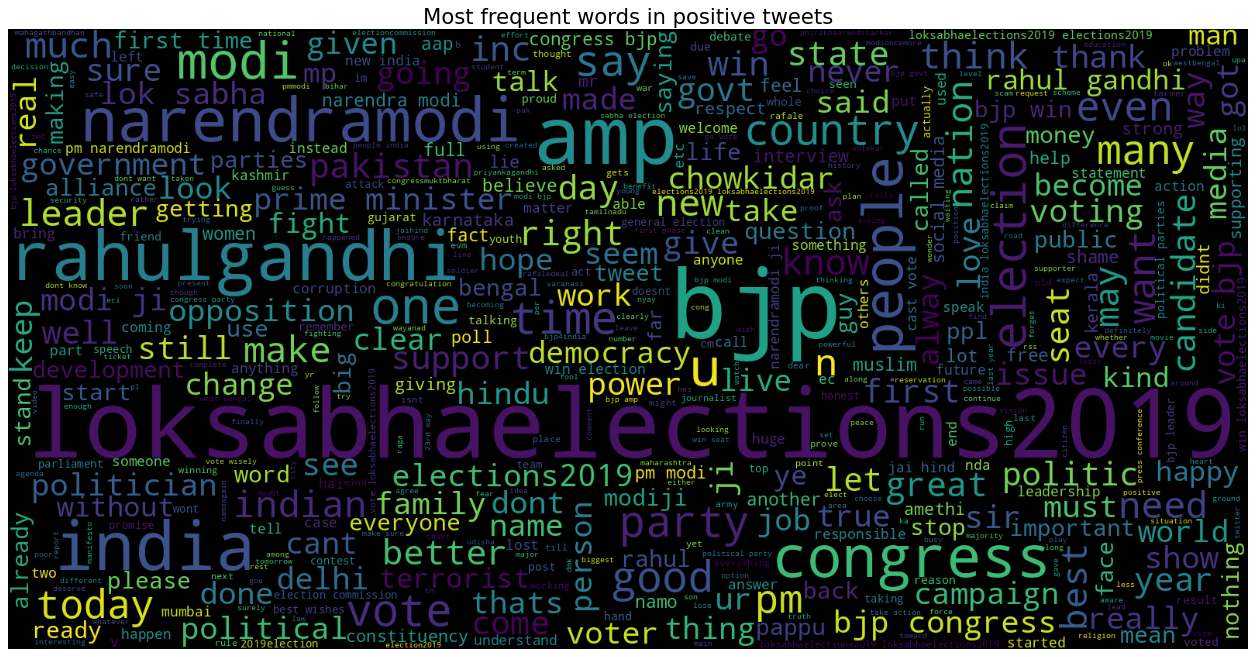

In [ ]:
text=' '.join([word for word in pos_tweets['Tweet']])
plt.figure(figsize=(20,15),facecolor='None')
# WordCloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
# plt.imshow(WordCloud,interpolation='bilinear')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets',fontsize=19)
plt.show()

In [ ]:
neg_tweets=text_df[text_df.sentiment=='Negative']
neg_tweets=neg_tweets.sort_values(['polarity'],ascending=False)
neg_tweets.head()

,Tweet,polarity,sentiment
46574,almost parties hate bjp many yrs whole india r...,-4.625929e-18,Negative
89649,one booth check drive 5 schools around arakere...,-4.625929e-18,Negative
62121,congress carries heavy ego well known logical ...,-4.625929e-18,Negative
53489,sir amp family huge supporter modi govt faith ...,-5.551115e-18,Negative
46948,unless rahul dyslexia narendramodi comments in...,-5.551115e-18,Negative


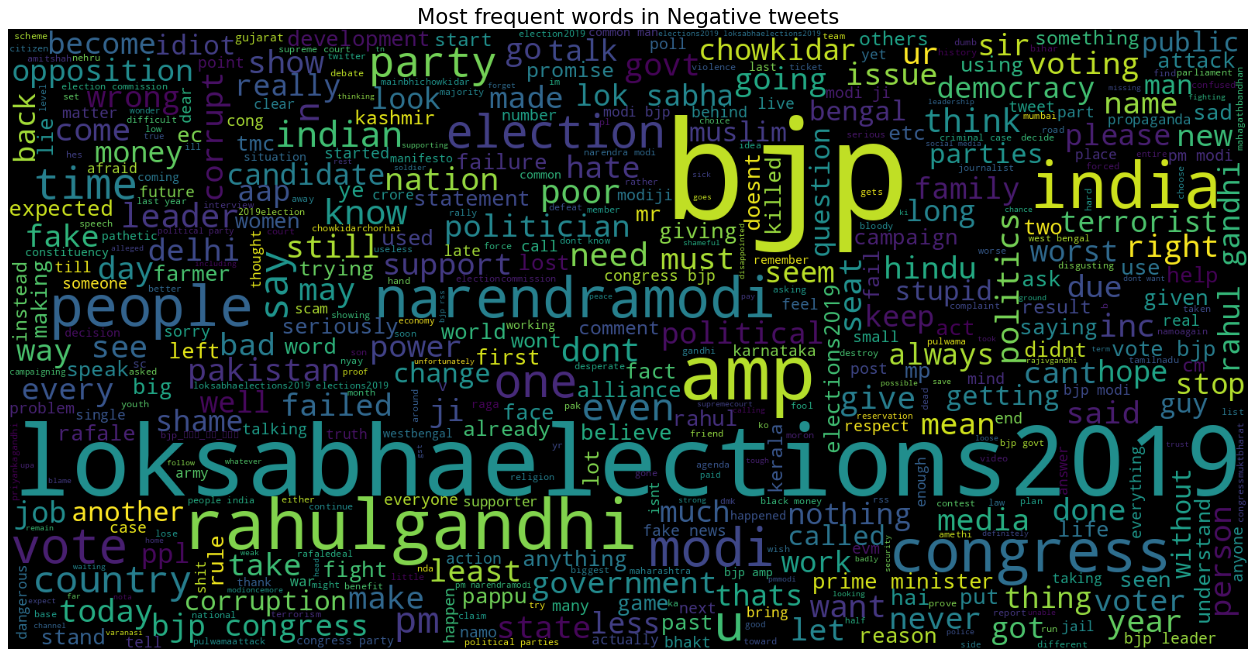

In [ ]:
text=' '.join([word for word in neg_tweets['Tweet']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative tweets',fontsize=19)
plt.show()

In [ ]:
neu_tweets=text_df[text_df.sentiment=='Neutral']
neu_tweets=neu_tweets.sort_values(['polarity'],ascending=False)
neu_tweets.head()

,Tweet,polarity,sentiment
5,somewhat biased exit poll india elections base...,0.0,Neutral
97930,voting done port blair votekaro loksabhaelecti...,0.0,Neutral
97869,theres saying make democracy work need partici...,0.0,Neutral
97872,ji always saying pahle matdan tab jalpansame t...,0.0,Neutral
97873,poly ticks politics loksabhaelections2019 just...,0.0,Neutral


In [ ]:
text=' '.join([word for word in neu_tweets['Tweet']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Neutral tweets',fontsize=19)
plt.show()

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Tweet'])

In [ ]:
# feature_names=vect.get_feature_names()
# print("Number of Features : {}\n".format(len(feature_names)))
# print("First 20 Features : {}".format(feature_names[:20]))
feature_names = vect.get_feature_names_out()
print("Number of Features: {}\n".format(len(feature_names)))
print("First 20 Features: {}".format(feature_names[:20]))


In [ ]:
x=text_df['Tweet']
y=text_df['sentiment']
x=vect.transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
print("size of x_train:",(x_train.shape))
print("size of y_train:",(y_train.shape))
print("size of x_test:",(x_test.shape))
print("size of y_test:",(y_test.shape))


In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred=logreg.predict(x_test)
logreg_acc=accuracy_score(logreg_pred,y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 93.56%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[ 4522   499   397]
 [   77 10655    86]
 [  281   454 10877]]


              precision    recall  f1-score   support

    Negative       0.93      0.83      0.88      5418
     Neutral       0.92      0.98      0.95     10818
    Positive       0.96      0.94      0.95     11612

    accuracy                           0.94     27848
   macro avg       0.93      0.92      0.93     27848
weighted avg       0.94      0.94      0.93     27848



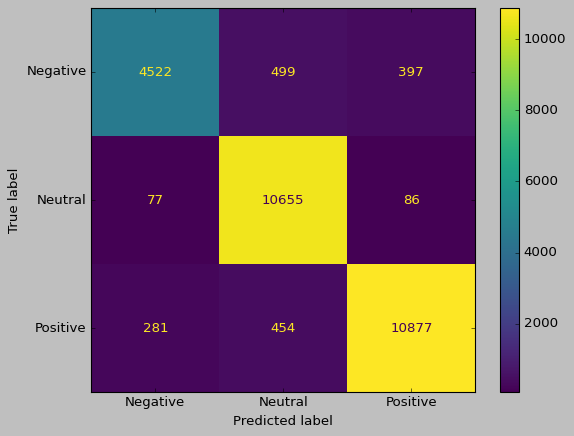

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid={'C':[0.001,0.01,0.1,1,10]}
# grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
# grid.fit(x_train,y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Assuming x_train and y_train are your training data
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)  # Specify the number of folds for cross-validation

grid.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# Get the best model
best_model = grid.best_estimator_

# Now you can use the best_model for prediction or evaluation


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best hyperparameters:  {'C': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Best Parameters:",grid.best_params_)

Best Parameters: {'C': 10}


In [ ]:
y_pred=grid.predict(x_test)

In [ ]:
logreg_acc=accuracy_score(y_pred,y_test)
print("Test Accuracy : {:.2f}% ".format(logreg_acc*100))

Test Accuracy : 94.35% 


In [ ]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[ 4642   403   373]
 [   74 10655    89]
 [  264   370 10978]]


              precision    recall  f1-score   support

    Negative       0.93      0.86      0.89      5418
     Neutral       0.93      0.98      0.96     10818
    Positive       0.96      0.95      0.95     11612

    accuracy                           0.94     27848
   macro avg       0.94      0.93      0.93     27848
weighted avg       0.94      0.94      0.94     27848



In [ ]:
#support vector
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel=LinearSVC()
SVCmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
svc_pred=SVCmodel.predict(x_test)
svc_acc=accuracy_score(svc_pred,y_test)
print("test accuracy is : {:.2f}%".format(svc_acc*100))

test accuracy is : 94.98%


In [ ]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[ 4746   293   379]
 [   76 10653    89]
 [  264   298 11050]]


              precision    recall  f1-score   support

    Negative       0.93      0.88      0.90      5418
     Neutral       0.95      0.98      0.97     10818
    Positive       0.96      0.95      0.96     11612

    accuracy                           0.95     27848
   macro avg       0.95      0.94      0.94     27848
weighted avg       0.95      0.95      0.95     27848



In [ ]:
grid={
    'C':[0.01,0.1,1,10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid=GridSearchCV(SVCmodel,param_grid,cv=4)
grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=4, estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best Parameters:",grid.best_params_)

Best Parameters: {'C': 10}


In [ ]:
y_pred=grid.predict(x_test)

In [ ]:
logreg_acc=accuracy_score(y_pred,y_test)
print("Test Accuracy : {:.2f}% ".format(logreg_acc*100))

Test Accuracy : 95.04% 


In [ ]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[ 4753   289   376]
 [   75 10654    89]
 [  266   287 11059]]


              precision    recall  f1-score   support

    Negative       0.93      0.88      0.90      5418
     Neutral       0.95      0.98      0.97     10818
    Positive       0.96      0.95      0.96     11612

    accuracy                           0.95     27848
   macro avg       0.95      0.94      0.94     27848
weighted avg       0.95      0.95      0.95     27848

